
#**Cyber Security Case Study: Based on Complaints**


## **Context:**

- **This dataset consists of complaints from Cyber Crime.**
- **It is more than 1.25 rows. It is full of raw data without cleaning. It includes cyber complaints at category and sub category wise.**


#### The purpose of this analysis is to explore the numerous features and build a classification model where we will be able to tag the rating based on the description and consequently rate them as positive or negative. In this analysis, we will be focusing on score, summary, description and score based sentiment features.



##**Steps:**
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers,
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary


In [236]:
!pip install contractions

In [237]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [238]:
from google.colab import drive
drive.mount('/content/drive')
# Load dataset.
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
data.shape                                               # print shape of data.

(93686, 3)

In [240]:
data.head()                                              # Print first 5 rows of data.

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [241]:
data.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [242]:
# Taking only 50000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping relevant columns from the data, as these are useful for our analysis.
print(data.columns.tolist())
data = data.loc[:49999, ['category','sub_category','crimeaditionalinfo']]

['category', 'sub_category', 'crimeaditionalinfo']


In [243]:
data.isnull().sum(axis=0)                                # Check for NULL values.

,0
category,0
sub_category,3474
crimeaditionalinfo,9


In [244]:
data=data.dropna()                                     # Dropping off missing values
data.columns                                           # Print the column of the dataframe

Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

In [245]:
data.shape                                            #Shape of the data

(46517, 3)

In [246]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [247]:
data.shape                                # Shape of data

(46517, 3)

### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [248]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['crimeaditionalinfo'] = data['crimeaditionalinfo'].apply(lambda x: strip_html(x))
data['sub_category'] = data['sub_category'].apply(lambda x: strip_html(x))

data.head()

<ipython-input-248-ec3dbd8422e4>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [249]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['crimeaditionalinfo'] = data['crimeaditionalinfo'].apply(lambda x: replace_contractions(x))
data['sub_category'] = data['sub_category'].apply(lambda x: replace_contractions(x))

data.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [250]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['crimeaditionalinfo'] = data['crimeaditionalinfo'].apply(lambda x: remove_numbers(x))
data['sub_category'] = data['sub_category'].apply(lambda x: remove_numbers(x))

data.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [251]:
import nltk
nltk.download('punkt_tab')
data['category'] = data.apply(lambda row: nltk.word_tokenize(row['category']), axis=1) # Tokenization of data
data['sub_category'] = data.apply(lambda row: nltk.word_tokenize(row['sub_category']), axis=1) # Tokenization of data
data['crimeaditionalinfo'] = data.apply(lambda row: nltk.word_tokenize(row['crimeaditionalinfo']), axis=1) # Tokenization of data

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [252]:
data.head()                                                                    # Look at how tokenized data looks.

,category,sub_category,crimeaditionalinfo
0,"[Online, and, Social, Media, Related, Crime]","[Cyber, Bullying, Stalking, Sexting]","[I, had, continue, received, random, calls, and, abusive, messages, in, my, whatsapp, Someone, added, my, number, in, a, unknown, facebook, group, name, with, Only, Girls, and, still, getting, calls, from, unknown, numbers, pls, help, me, and, sort, out, the, issue, as, soon, as, possible, Thank, you]"
1,"[Online, Financial, Fraud]","[Fraud, CallVishing]","[The, above, fraudster, is, continuously, messaging, me, and, Asking, me, to, pay, him, money, or, he, will, send, fake, cropped, nude, photos, of, me, to, my, other, contacts, through, WhatsApp, I, am, unaware, how, he, has, recieved, my, contacts, list, from, my, phone, Please, help]"
2,"[Online, Gambling, Betting]","[Online, Gambling, Betting]","[He, is, acting, like, a, police, and, demanding, for, money, by, adding, sections, in, the, text, messages, I, request, you, to, take, an, immediate, action, on, him, Frequently, he, is, harassing, with, these, messages, For, reference, please, find, attached, files]"
3,"[Online, and, Social, Media, Related, Crime]","[Online, Job, Fraud]","[In, apna, Job, I, have, applied, for, job, interview, for, telecalling, and, the, resource, management, wrote, that, twelve, hundred, will, be, charged, for, security, amount, of, laptop, and, work, from, home, when, I, have, given, interview, on, the, given, address, next, day, they, charged, twelve, hundred, and, six, hundred, more, money, in, the, name, of, insurance, after, that, they, have, referred, me, to, the, job, calling, there, is, no, work, of, laptop, neither, a, work, from, home, kindly, please, take, action, against, it, as, soon, as, possible, and, if, possible, please, help, me, to, recover, my, financial, loss]"
4,"[Online, Financial, Fraud]","[Fraud, CallVishing]","[I, received, a, call, from, lady, stating, that, she, will, send, new, phone, of, vivo, and, I, received, that, parcel, through, post, on, th, February, to, Kurnool, head, post, office, where, I, have, not, received, any, mobile]"


In [253]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [254]:
len(stopwords)

146

In [255]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['category'] = data.apply(lambda row: normalize(row['category']), axis=1)
data['sub_category'] = data.apply(lambda row: normalize(row['sub_category']), axis=1)
data['crimeaditionalinfo'] = data.apply(lambda row: normalize(row['crimeaditionalinfo']), axis=1)
data.head()

,category,sub_category,crimeaditionalinfo
0,online social media relate crime,cyber bully stalk sexting,continue receive random call abusive message whatsapp someone add number unknown facebook group name girls still get call unknown number pls help sort issue soon possible thank
1,online financial fraud,fraud callvishing,fraudster continuously message ask pay money send fake crop nude photos contact whatsapp unaware recieved contact list phone please help
2,online gamble bet,online gamble bet,act like police demand money add section text message request take immediate action frequently harass message reference please find attach file
3,online social media relate crime,online job fraud,apna job apply job interview telecalling resource management write twelve hundred charge security amount laptop work home give interview give address next day charge twelve hundred six hundred money name insurance refer job call work laptop neither work home kindly please take action soon possible possible please help recover financial loss
4,online financial fraud,fraud callvishing,receive call lady state send new phone vivo receive parcel post th february kurnool head post office not receive mobile


### **Word Cloud based on Summary and Score**

In [256]:
data['crimeaditionalinfo'] = data.apply(lambda row: nltk.word_tokenize(row['crimeaditionalinfo']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['crimeaditionalinfo'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

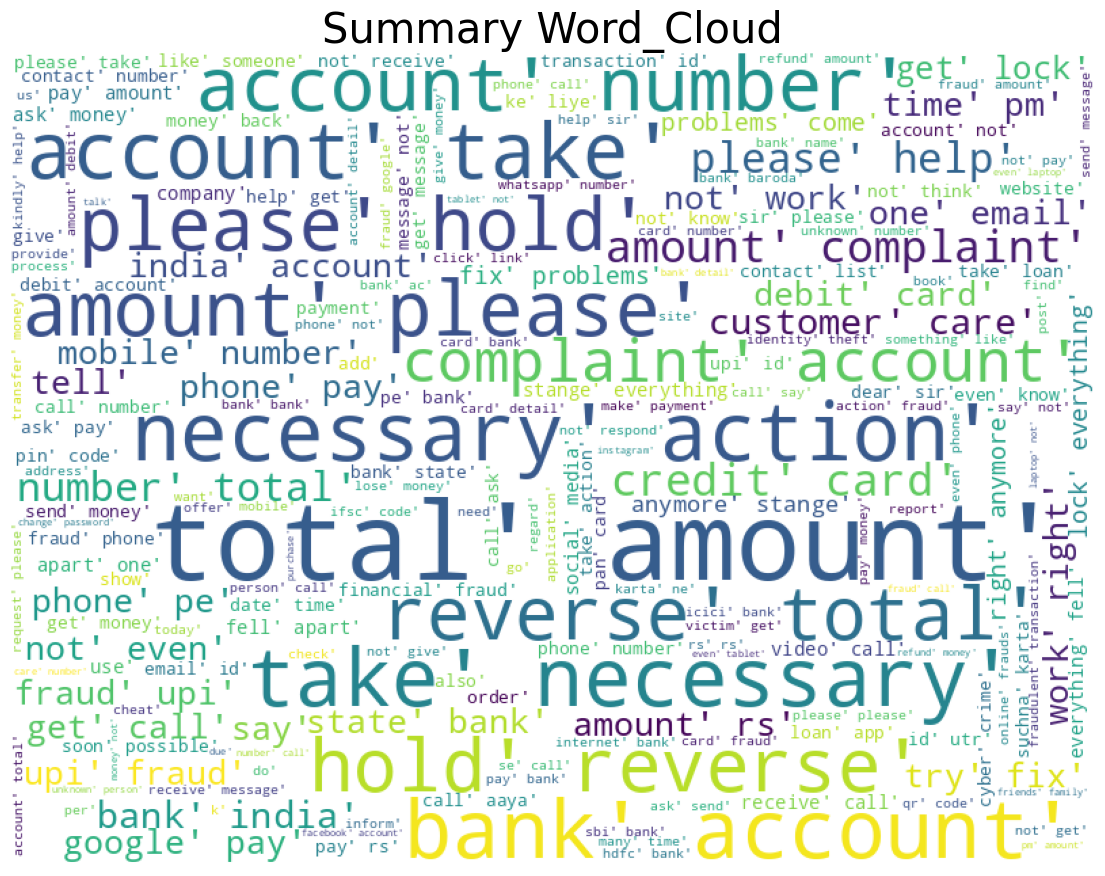

In [257]:
show_wordcloud(data,'Summary Word_Cloud')


- Most of the word in the word summary column are showing financial related issues
- We can see the most frequent words choosen by consumers to express their financial related problems

### **Building the model based on CountVectorizer and Random Forest**

In [258]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['category'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [259]:
data_features.shape

(46517, 22)

In [260]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [261]:
labels = data['category']
#labels = labels.astype('int')

In [262]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [263]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
1.0


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [264]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [265]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

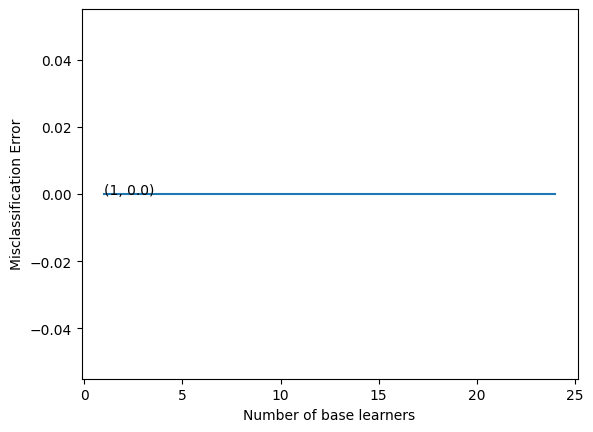

In [266]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [267]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = 20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [268]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[  72    0    0    0    0    0    0    0    0    0]
 [   0  574    0    0    0    0    0    0    0    0]
 [   0    0 1790    0    0    0    0    0    0    0]
 [   0    0    0   26    0    0    0    0    0    0]
 [   0    0    0    0  264    0    0    0    0    0]
 [   0    0    0    0    0   28    0    0    0    0]
 [   0    0    0    0    0    0 9221    0    0    0]
 [   0    0    0    0    0    0    0   70    0    0]
 [   0    0    0    0    0    0    0    0 1906    0]
 [   0    0    0    0    0    0    0    0    0    5]]
1.0


<Axes: >

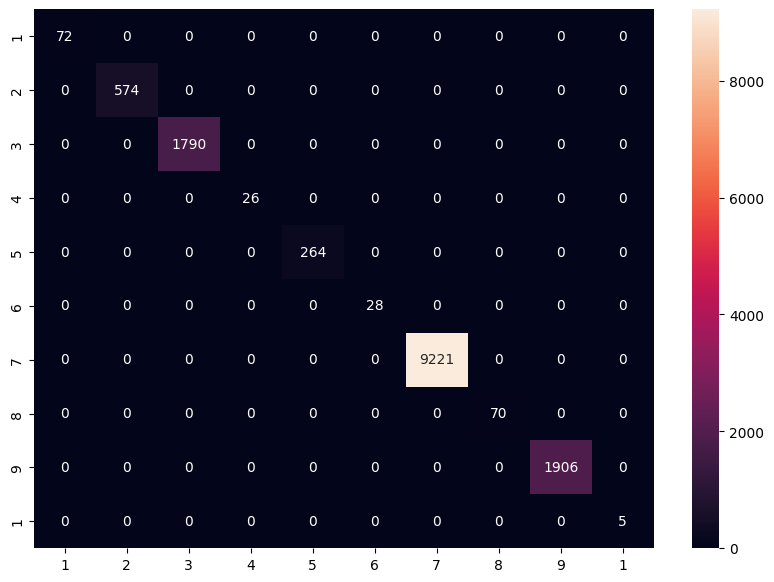

In [269]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "1234567891"],
                  columns = [i for i in "1234567891"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 20 important features from the CountVectorizer + Random Forest based model**

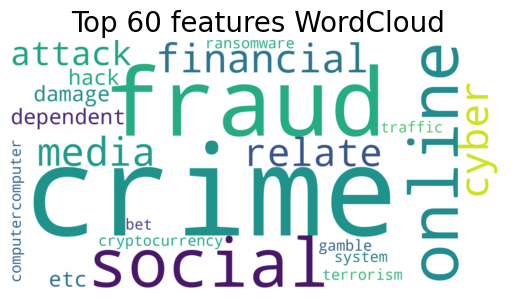

In [270]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clf' is a trained classifier
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

# Assuming 'bow_vec' is your CountVectorizer
all_features = bow_vec.get_feature_names_out()

top_features = ' '.join(all_features[i] for i in features[0:60])

wordcloud = WordCloud(
    background_color="white",
    colormap='viridis',
    width=2000,
    height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(20, 15), frameon='equal')
plt.title('Top 60 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()


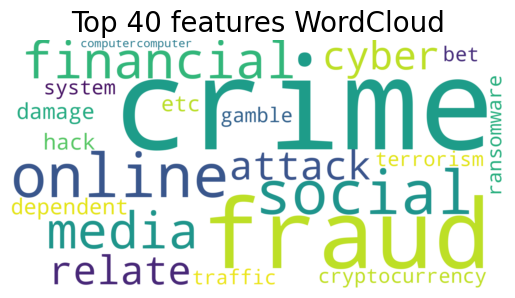

In [271]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clf' is a trained classifier
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

# Assuming 'bow_vec' is your CountVectorizer
all_features = bow_vec.get_feature_names_out()

top_features = ' '.join(all_features[i] for i in features[0:40])

wordcloud = WordCloud(
    background_color="white",
    colormap='viridis',
    width=2000,
    height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()


### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [272]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['category'])

data_features = data_features.toarray()

data_features.shape

(46517, 22)

In [273]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.2, random_state=42)

In [274]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
1.0


In [275]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

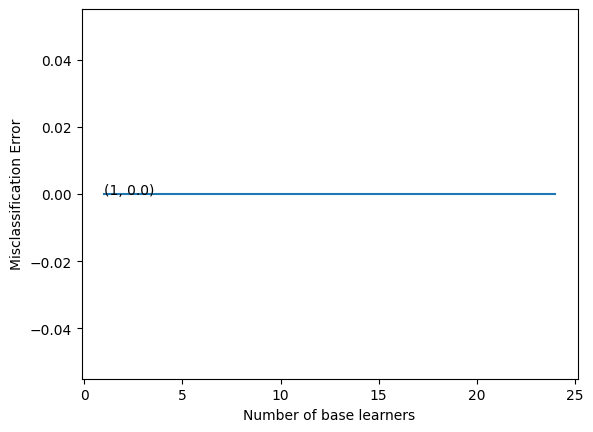

In [276]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [277]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = 21)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [278]:
result = clf.predict(X_test)

[[  42    0    0    0    0    0    0    0    0    0]
 [   0  360    0    0    0    0    0    0    0    0]
 [   0    0 1178    0    0    0    0    0    0    0]
 [   0    0    0   16    0    0    0    0    0    0]
 [   0    0    0    0  195    0    0    0    0    0]
 [   0    0    0    0    0   20    0    0    0    0]
 [   0    0    0    0    0    0 6149    0    0    0]
 [   0    0    0    0    0    0    0   48    0    0]
 [   0    0    0    0    0    0    0    0 1292    0]
 [   0    0    0    0    0    0    0    0    0    4]]
1.0


<Axes: >

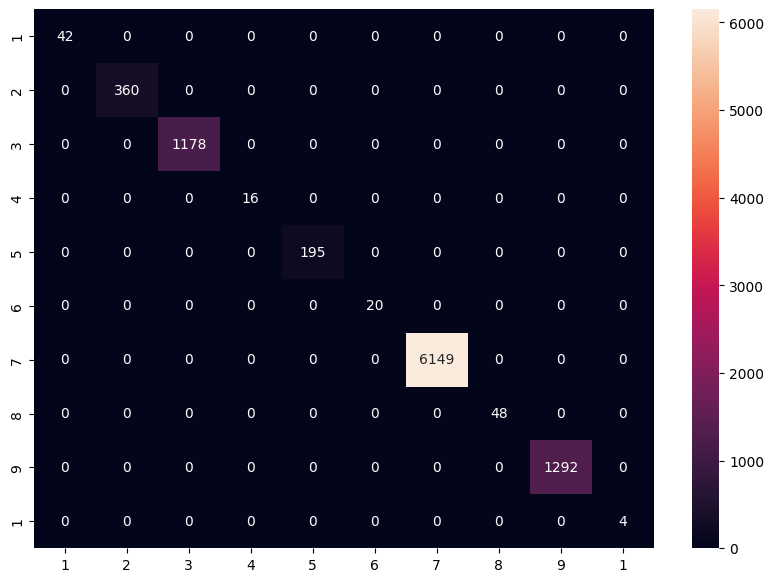

In [279]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "1234567891"],
                  columns = [i for i in "1234567891"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

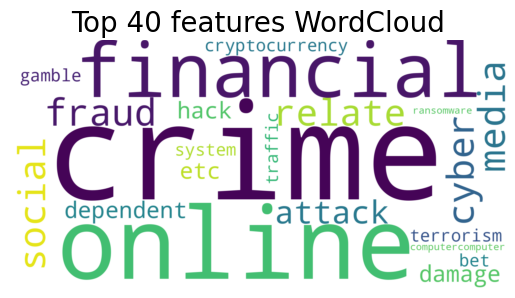

In [280]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clf' is a trained classifier
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

# Assuming 'bow_vec' is your CountVectorizer
all_features = bow_vec.get_feature_names_out()

top_features = ' '.join(all_features[i] for i in features[0:40])

wordcloud = WordCloud(
    background_color="white",
    colormap='viridis',
    width=2000,
    height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()


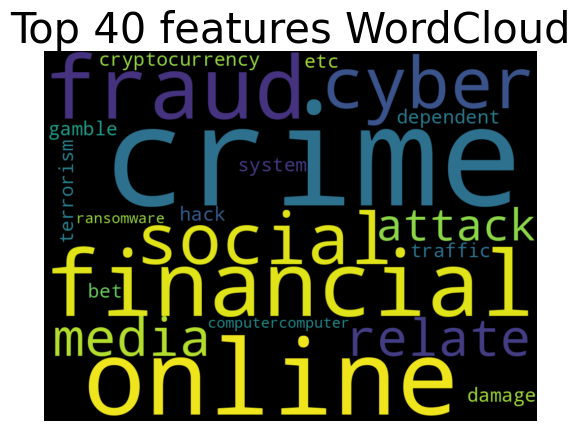

In [281]:

all_features = vectorizer.get_feature_names_out()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '


from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000,
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### **Summary**:

-
- The goal was to **build a model for text-classification**.
-
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary .
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- However, **we can still increase the accuracy of our model by increasing the dataset we took into account for the model building** (We've currently only used 50,000 entries out of around 500,000 entries, which means **we built our current model using just 10% of the dataset**)
- We can also increase the **max_feature parameter** in the vectorizer.
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.